# Tutorial 11: Tour de Hypothesis Testings

CBE 20258. Numerical and Statistical Analysis. Fall 2019.

&#169; Alexander Dowling, University of Notre Dame

In [1]:
# load libraries
import scipy.stats as stats
import numpy as np
import math
import matplotlib.pyplot as plt

## Introduction

There are many flavors of hypothesis testing. In this tutorial, we will explore the types of hypothesis testing you are most likely to encounter as an engineer. Our textbook explores many more extensions. Remember, confidence intervals and hypothesis testings are conceptually very similar!

| Problem Type | Confidence Intervals | Hypothesis Testing |
| - | - | - |
| Large-Sample Population Mean | §5.1 | §6.1 |
| Proportions | §5.2 | §6.3 |
| Small-Sample Population Mean | §5.3 | §6.4 |
| (Large-Sample) Difference Between Two Means | §5.4 | §6.5 |
| Difference Between Two Proportions | §5.5 | §6.6 |
| Small-Sample Difference Between Two Means | §5.6 | §6.7 |
| Paired Data | §5.7 | §6.8 |

**Large-Sample** is code for "use z-statistic" and **Small-Sample** is code for "use t-statistic".

## Tutorial 11 Learning Objectives

After studying this notebook, completing the activities, and reviewing the textbook, you should be able to:
* Apply the five-step hypothesis testing method
* Decide which test type and statistic to use based on the problem description
* Check assumptions for the chosen statistical test

## T11a. Small-Sample Test for Population Mean
**a.k.a. single-sample t-test**

### Motivating Example

During your internships at Off-Brand Cola, Inc. this summer, you learn that a 12oz can of fizz has a sugar content specification of 38.98 - 39.02 grams. The manufacturing process is supposed to be calibrated so the mean sugar per can is 39.00 grams (otherwise the FDA gets upset), which is the center of the specification window. Six cans are randomly selected for inspection. There sugar contents are:

In [2]:
sugar = [39.030, 38.997, 39.012, 39.008, 39.019, 39.002]

Based on historical data, you are comfortable assuming the population distribution is normal.

**Main Question** Can you conclude the process needs recalibration?

We will now walk through the 5-step hypothesis testing procedure.

### Step 1. Define Hypotheses.

Let $\mu$ denote the population mean.

$$H_0: \mu = 39.00 \qquad \mathrm{versus} \qquad H_1: \mu \neq 39.00$$

### Step 2. Assume $H_0$ is True.

### Step 3. Compute the Test Statistic.

We do not know the population standard deviation, so we will use a t-statistic.

$$
t = \frac{\bar{x} - \mu}{s / \sqrt{n}}
$$

Before we proceed with the calculation, we should check out dataset for outliers. We assumed the population distribution is normal, but we should still plot the sample to check.

In [3]:
# calculate sample mean and standard deviation
xbar = np.mean(sugar)

# ddof=1 uses the 1/(N-1) formula
# ddof=0 uses the 1/N formula (default)
# notice we are using numpy instead of pandas to compute standard deviation
s = np.std(sugar,ddof=1)
n = len(sugar)

print("Sample Mean:",xbar,"g")
print("Sample Standard Deviation:",s,"g")

Sample Mean: 39.01133333333333 g
Sample Standard Deviation: 0.011927559124425172 g


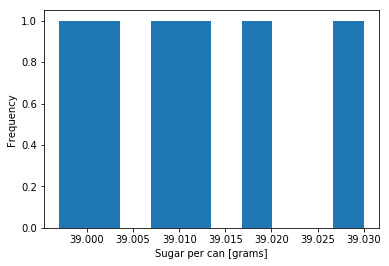

In [4]:
# plot histogram
plt.hist(sugar)
plt.xlabel("Sugar per can [grams]")
plt.ylabel("Frequency")
plt.show()

**Interpretation**: Six samples is fairly small. Although the largest value may look like an outlier, it is within two standard deviations of the sample mean which is not too uncommon by random chance.

We can now **compute the test statistic**:

In [5]:
tscore = (xbar - 39.00)/(s / math.sqrt(n))
print("t = ",tscore)

t =  2.3274572326112604


### Step 4. Calculate P-Value.

Store your answer in `pvalue_a`.

In [6]:
### BEGIN SOLUTION
pvalue_a = 2*stats.t.cdf(-tscore, n-1)
print(pvalue_a)
### END SOLUTION

0.06742438341891084


In [7]:
### BEGIN HIDDEN TESTS
secret_answer = 0.06742

assert pvalue_a > secret_answer - 1E-2, "Too small."
assert pvalue_a < secret_answer + 1E-2, "Too large."

### END HIDDEN TESTS

### Step 5. State Conclusions.

You now need to interpret the results and state the conclusions. Because the calibration is fast and inexpensive, your team decide to use a significance level of $\alpha=$ 7.5%.

Fill in the blank. Store your selection as a integer 1, 2, 3, or 4 in `interpret_a`.

Therefore, we __________.
1. Accept the null hypothesis.
2. Reject the null hypothesis.
3. Fail to reject the null hypothesis.
4. None of the above.

In [8]:
### BEGIN SOLUTION

interpret_a = 2

### END SOLUTION

In [9]:
### BEGIN HIDDEN TESTS
secret_answer = 2

assert interpret_a == secret_answer, "Compare the p-value to the significance level."
### END HIDDEN TESTS

Should we recommend to recalibrate the machine? Store your answer as `True` or `False` in `conclude_a`.

In [10]:
### BEGIN SOLUTION

conclude_a = True

### END SOLUTION

In [11]:
### BEGIN HIDDEN TESTS

secret_answer = True

assert conclude_a == secret_answer, "What as the null hypothesis?"

### END HIDDEN TESTS

## T11b. Small-Sample Difference Between Two Means
**a.k.a. two-sample t-test**

### Motivating Example

Consider the comparison of item recognition between two website designs. A sample of $n_Y$ = 10 users using a conventional website design averaged $\bar{Y} = $ 32.2 items identified, with a standard deviation of $s_Y$ = 8.56. A separate sample of $n_X$ = 10 users using a new website design averaged $\bar{X}$ = 44.1 items identified, with a standard deviation of $s_X$ = 10.09.

Can we conclude the mean number of items identified is greater with the new website design?

### Step 1. Define Hypotheses.

Let $\mu_X$ and $\mu_Y$ denote the population means for the new and old designs, respectively.

$$H_0: \mu_X - \mu_Y \leq 0 \qquad \mathrm{versus} \qquad H_1: \mu_X - \mu_Y > 0$$

### Step 2. Assume $H_0$ is True.

### Step 3. Compute the Test Statistic.

We do not know the population standard deviation, so we will use a t-statistic for the difference of means.

$$
t = \frac{\bar{X} - \bar{Y} - 0}{\sqrt{s_X^2/n_x + s_Y^2/n_Y}}
$$

In order to use this test, we must assume both populations are normally distributed.

The degrees of freedom are:

$$
\nu = \frac{\left(\frac{s_X^2}{n_X} + \frac{s_Y^2}{n_Y}\right)^2}{\frac{(s_X^2/n_X)^2}{n_X - 1} + \frac{(s_Y^2/n_Y)^2}{n_Y - 1}}, \qquad \mathrm{rounded~down~to~the~nearest~integer}
$$

In [12]:
# old website
ybar = 32.2
sy = 8.56
ny = 10

# new website
xbar = 44.1
sx = 10.09
nx = 10

t = (xbar - ybar - 0)/math.sqrt(sx**2/nx + sy**2/ny)
print("t = ",t)

t =  2.8439803014215195


Calculate the degrees of freedom ($\nu$). Store your answer in `dof_b`. Remember to round down.

In [13]:
### BEGIN SOLUTION

sx2n = sx**2/nx
sy2n = sy**2/ny

nu = (sx2n + sy2n)**2 / (sx2n**2/(nx-1) +sy2n**2/(ny-1))

dof_b = np.floor(nu)

### END SOLUTION
print("Degrees of freedom:")
print(dof_b)

Degrees of freedom:
17.0


In [14]:
### BEGIN HIDDEN TESTS
secret_answer = 17

assert dof_b > secret_answer - 0.01, "Too small."

assert dof_b < secret_answer + 0.01, "Too large."

### END HIDDEN TESTS

### Step 4. Calculate the P-Value.

Calculate the P-value. Store your result in `pvalue_b`.

In [15]:
### BEGIN SOLUTION

pvalue_b = 1 - stats.t.cdf(t, dof_b)

### END SOLUTION

print("P-value")
print(pvalue_b)

P-value
0.005607955797872655


In [16]:
### BEGIN HIDDEN TESTS

secret_answer = 0.005608

assert pvalue_b > secret_answer - 2E-3

assert pvalue_b < secret_answer + 2E-3

### END HIDDEN TESTS

### Step 5. State Conclusions.

The marketing team decides a priori to use a significance level of 5% to balance reward and costs.

Choose the best conclusion from the following:
1. Reject the null hypothesis. The **old** website has a higher mean number of items recognized.
2. Reject the null hypothesis. The **new** website has a higher mean number of items recognized.
3. Accept the null hypothesis. The **old** website has a higher mean number of items recognized.
4. Accept the null hypothesis. The **new** website has a higher mean number of items recognized.
5. Fail to reject the null hypothesis. The **old** website has a higher mean number of items recognized.
6. Fail to reject the null hypothesis. The **new** website has a higher mean number of items recognized.


Record your answer as an integer in `conclude_b`.

In [17]:
### BEGIN SOLUTION

conclude_b = 2

### END SOLUTION

In [18]:
### BEGIN HIDDEN TESTS

secret_answer = 2

assert conclude_b == secret_answer, "Reread the problem statement."

### END HIDDEN TESTS

## T11c. Small-Sample Different Between Pairwise Means
**a.k.a. paired t-test**

### Motivating Example

Particulate matter (PM) emissions from automobiles cause serious environmental impacts. Eight vehicles were chosen at random from a fleet, and their emissions were measured under both highway and stop-and-go driving conditions. The difference, stop-and-go minus highway emissions, for each car were then computed. Below are the results in mg per gallon of fuel:

In [19]:
stop_go = np.array([1500, 870, 1120, 1250, 3460, 1110, 1120, 880])
highway = np.array([941, 456, 893, 1060, 3107, 1339, 1346, 644])

diff = stop_go - highway
print(diff)

[ 559  414  227  190  353 -229 -226  236]


The first element of each array are data from car 1, the second for car 2, etc.

Can we conclude that the mean level of emissions is less for highway driving than for stop-and-go driving?

### Step 1. Define Hypotheses.

We will treat the difference for each car as a single random variable: $D$. Let $\mu_D$ and $\sigma_D$ represent the mean and standard deviation of the population distribution for the difference.

$$H_0: \mu_D \leq 0 \qquad \mathrm{versus} \qquad H_1: \mu_D > 0$$

### Step 2. Assume $H_0$ is True.

### Step 3. Compute the Test Statistic.

We do not know the population standard deviation, so we will use a t-statistic.

$$
t = \frac{\bar{D} - \mu_D}{s / \sqrt{n}}
$$

Notice this becomes a "vanilla" one-sample t-test after we take the difference.

Before we proceed with the calculation, we should check out dataset for outliers. We assumed the population distribution is normal, but we should still plot the sample to check.

In [20]:
# calculate sample mean and standard deviation
xbar = np.mean(diff)

# ddof=1 uses the 1/(N-1) formula
# ddof=0 uses the 1/N formula (default)
# some statistics textbooks strongly emphasize using 1/(N-1)
# we will not dwell on the different this semester and use them interchangably
# we will use ddof=1 to match the scanned figure below
s = np.std(diff,ddof=1)
n = len(diff)

print("Sample Mean:",xbar,"mg / gallon fuel")
print("Sample Standard Deviation:",s,"mg / gallon fuel")

Sample Mean: 190.5 mg / gallon fuel
Sample Standard Deviation: 284.1041056675226 mg / gallon fuel


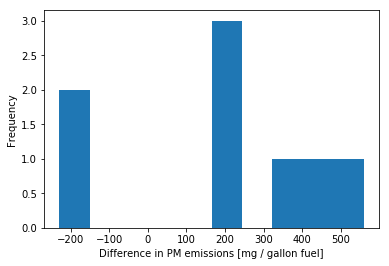

In [21]:
# plot histogram
plt.hist(diff)
plt.xlabel("Difference in PM emissions [mg / gallon fuel]")
plt.ylabel("Frequency")
plt.show()

**Interpretation**: There are two cars with a negative difference. The remaining six have a positive difference. The two cars look like outliers. We will proceed with the hypothesis testing to offer a complete example, but we need to be extremely skeptical of the results. From an engineering perspective, **we should investigate these two outliers further**. This could give us new insights about PM emissions.

We will now **compute the test statistic**:

In [22]:
tscore = (xbar - 0)/(s / math.sqrt(n))
print("t = ",tscore)

t =  1.8965419946965025


### Step 4. Calculate P-Value.

Which sketch below shows the correct shaded region for this hypothesis test?

![test](https://drive.google.com/uc?export=view&id=1n0-gqcb9rCgN-nRZYbywLZvPl3TUwPBr)

Choices:
1. one-sided (left)
2. two-sided
3. one-sided (right)
4. none of these

Record your answer as an integer in `sketch_c`.

In [23]:
### BEGIN SOLUTION
sketch_c = 3
### END SOLUTION

In [24]:
### BEGIN HIDDEN TESTS
secret_answer = 3

assert sketch_c == secret_answer, "Check your class notes."
### END HIDDEN TESTS

Now calculate the p-value. Store your answer in `pvalue_c`.

In [25]:
### BEGIN SOLUTION

pvalue_c = 1 - stats.t.cdf(tscore, n-1)

### END SOLUTION

print("P-value:")
print(pvalue_c)

P-value:
0.049855871601833246


In [26]:
### BEGIN HIDDEN TESTS
secret_answer = 0.04985

assert pvalue_c < secret_answer + 1E-3, "Too large."

assert pvalue_c > secret_answer - 1E-3, "Too small."

### END HIDDEN TESTS

### Step 5. State Conclusions.

We will not interpret the P-value for this example because the sample contains likely outliers. This suggests the assumption that the population is normally distributed is violated, and thus we cannot apply the t-test.

Instead we recommend:
1. Investigate why two cars had a different trend than the other 2.
2. Take a larger sample. This would allow us to invoke the central limit theorem.

## T11d. Population Proportion

### Motivating Example

A supplier of semiconductor wafers claims that for all of the wafers they supply, no more than 10% are defective. We receive and test a sample of 400 wafers, and find 50 of them ($\hat{p}$ = 50/400 = 12.5%) are defective. Can we conclude the supplier's claim is false?

In [27]:
# proportion of tested waffers that are defective
# sample proportion
phat = 0.125

# sample size
n = 400

### Step 1. Define Hypotheses.

Let $p$ represent the proportion of defective wafers in the population. If we assume the manufacturing of each wafer is independent, $p$ is also the probability a single wafer is defective.

$$H_0: p \leq 0.1 \qquad \mathrm{versus} \qquad H_1: p > 0.1$$

In [28]:
# null hypothesis proportion
p = 0.1

### Step 2. Assume $H_0$ is True.

### Step 3. Compute the Test Statistic.

Recall $\hat{p}$ is the **sample proportion**, which we will use to draw inferences about the **population proportion** $p$.

If we assume wafers are sampled independently, we can use the large sample size to invoke the Central Limit Theorem:

$$
\hat{p} \sim \mathcal{N}\left(p,~ \frac{p(1-p)}{n} \right)
$$

*Side note*: We could model wafer production with the binomial distribution. With a large sample (many trials), the binomial distribution is closely approximated by the normal distribution.

The standard deviation of $\hat{p}$, denoted $\sigma_{\hat{p}}$ is calculated as follows:

$$
\sigma_{\hat{p}} = \sqrt{\frac{p (1-p)}{n}}
$$

We can now calculate the z-statistics:

$$
z = \frac{\hat{p} - p}{\sigma_{\hat{p}}}
$$

In [29]:
s_phat = math.sqrt(p*(1-p)/n)
print("sigma_phat =",s_phat)

sigma_phat = 0.015000000000000001


In [30]:
z = (phat - p)/s_phat
print("z =",z)

z = 1.666666666666666


### Step 4. Calculate P-Value.

Calculate the P-value. Store your answer in `pvalue_d`.

In [31]:
### BEGIN SOLUTION

pvalue_d = 1 - stats.norm.cdf(z)

### END SOLUTION

print("P-value:")
print(pvalue_d)

P-value:
0.04779035227281481


In [32]:
### BEGIN HIDDEN TESTS

secret_answer = 0.04779

assert pvalue_d > secret_answer - 1E-2

assert pvalue_d < secret_answer + 1E-2

### END HIDDEN TESTS

### Step 5. State Conclusions.

Choose the best set of conclusions using an $\alpha$ = 0.01 significance level:
1. Reject the null hypothesis. The claim is true.
2. Reject the null hypothesis. Based on the data, we cannot determine the claim is false.
3. Reject the null hypothesis. The claim is false.
4. Fail to reject the null hypothesis. The claim is true.
5. Fail to reject the null hypothesis. The claim is false.
6. Fail to reject the null hypothesis. Based on the data, we cannot determine the claim is false.
7. Accept the null hypothesis. The claim is true.
8. Accept the null hypothesis. The claim is false.
9. Accept the null hypothesis. Based on the data, we cannot determine the claim is false.

Record your selection as an integer in `conclude_d`.

In [33]:
### BEGIN SOLUTION

conclude_d = 6

### END SOLUTION

In [34]:
### BEGIN HIDDEN TESTS

secret_answer = 6

assert conclude_d == secret_answer
### END HIDDEN TESTS